# Naive Bayes Classifier- Weather

In [1]:
# cyclone

import pandas as pd
import matplotlib
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# load the data
data = pd.read_csv('pacific.csv')
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [5]:
# data wrangling
pred_columns = data[:]

pred_columns.drop(['Date','Time','Name','ID', 'Event',
                   'Status', 'Latitude', 'Longitude'],
                 axis=1, inplace=True)
prediction_var = pred_columns.columns
list(prediction_var)

['Maximum Wind',
 'Minimum Pressure',
 'Low Wind NE',
 'Low Wind SE',
 'Low Wind SW',
 'Low Wind NW',
 'Moderate Wind NE',
 'Moderate Wind SE',
 'Moderate Wind SW',
 'Moderate Wind NW',
 'High Wind NE',
 'High Wind SE',
 'High Wind SW',
 'High Wind NW']

In [7]:
# lets split the data in training and testing
train, test = train_test_split(data, test_size=0.3)
print(train.shape)
print(test.shape)

train_X = train[prediction_var]
train_Y = train['Status']

test_X = test[prediction_var]
test_Y = test['Status']

(18295, 22)
(7842, 22)


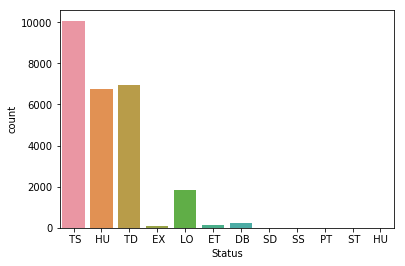

In [8]:
sns.countplot(data['Status'])

In [9]:
# use the model now
gnb_classifier = GaussianNB()

#train
gnb_classifier.fit(train_X, train_Y)

# prediction/testing
predicted_gnb = gnb_classifier.predict(test_X)

accuracy_score(test_Y, predicted_gnb)



0.05916857944401938

## Confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_Y, predicted_gnb)
mat

array([[  70,    0,    0,    0,    0,    0,    2,    0,    0,    0,    0],
       [   0,   45,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   3,   22,    0,    0,    2,    0,    1,    0,    0,    0,    0],
       [   0, 1647,    0,  339,    0,    0,    0,    0,   40,    0,    0],
       [ 453,   32,    0,    0,    0,    4,   22,    4,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    4,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 261, 1775,    0,    0,    0,    0,   60,    0,    0,    0,    0],
       [   0, 2429,    0,    0,    2,   69,    0,  549,    0,    0,    5]])

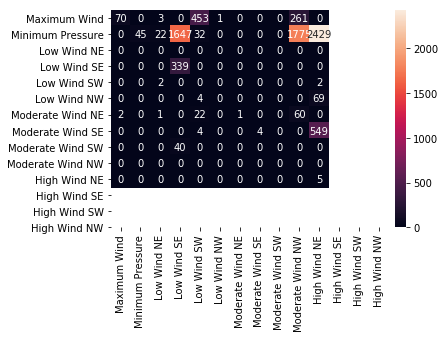

In [12]:
#plot the confusion matrix
sns.heatmap(mat.T,
            fmt='d',
            annot=True,
            xticklabels=prediction_var,
            yticklabels=prediction_var)

In [ ]:
# Example to understand the confusion matrix
"""
A classfication model is trained to distinguish between cats, dogs and
rabbits, a confusion matrix would summarize the results of testing the
algorithm for further inspection.
    Assuming a test sample of 27animals= 8cats, 6Dogs and 13Rabbits, the 
    confusion matrix OP:
   
True posit
"""

## Definition of terms:
- Positive: Observation is +ve
- negative : observation  is -ve
- True positive(TP) : Observation(real) is +ve and is predicted to be positive
- False negative(FN): Observation(real) is positive but prediction is -ve
- True negative TN: Observation(real) is -ve but prediction is -ve
- False positive: Observation(real) is -ve but prediction is +ve
